In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pysr import PySRRegressor
from gplearn.genetic import SymbolicRegressor
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sympy import *
from sklearn.utils.random import check_random_state
import graphviz
import time

# Covid India

In [3]:
covid_india = pd.read_csv("case_time_series.csv")

In [7]:
covid_india.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30-Jan,1,1,0,0,0,0
1,31-Jan,0,1,0,0,0,0
2,01-Feb,0,1,0,0,0,0
3,02-Feb,1,2,0,0,0,0
4,03-Feb,1,3,0,0,0,0


In [13]:
covid_india.shape

(93, 7)

In [12]:
covid_india.dtypes

Date               object
Daily Confirmed     int64
Total Confirmed     int64
Daily Recovered     int64
Total Recovered     int64
Daily Deceased      int64
Total Deceased      int64
dtype: object

<AxesSubplot:>

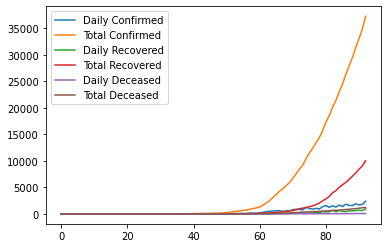

In [4]:
covid_india.plot()

In [ ]:
df = covid_india[["Date", "Total Deceased"]]

In [ ]:
Date_range = pd.date_range(start='1/30/2020', end='05/01/2020', freq='D')

In [ ]:
df["Date"] = Date_range

In [ ]:
plt.plot(df["Date"], df["Total Deceased"])

In [ ]:
df = df.reset_index(level=0)

In [ ]:
X = df[['index']]
y = df['Total Deceased']
y_true = y
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'abs',
                'log', 'inv','sin', 'cos']
est_gp = SymbolicRegressor(population_size=5000, function_set = function_set,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.1, random_state=0)
est_gp.fit(X_train, y_train)

In [ ]:
score_gp1 = est_gp.score(X_test, y_test)
print('R2:', score_gp1)

In [ ]:
converter = {
    'add': lambda x, y : x + y,
    'sub': lambda x, y : x - y,
    'mul': lambda x, y : x*y,
    'div': lambda x, y : x/y,
    'sqrt': lambda x : x**0.5,
    'log': lambda x : log(x),
    'abs': lambda x : abs(x),
    'neg': lambda x : -x,
    'inv': lambda x : 1/x,
    'max': lambda x, y : max(x, y),
    'min': lambda x, y : min(x, y),
    'sin': lambda x : sin(x),
    'cos': lambda x : cos(x),
    'pow': lambda x, y : x**y,
}
next_e = sympify(str(est_gp._program), locals=converter)
next_e

In [ ]:
y_gp1 = est_gp.predict(X_test)
fig = plt.figure(constrained_layout=False, dpi=100)
gs = fig.add_gridspec(nrows=7, ncols=1)
f_ax1 = fig.add_subplot(gs[0:5,0])
plt.title('Covid india death')
plt.scatter(X_test, y_test, label = 'True function')
plt.scatter(X_test, y_gp1, marker = 'v', s = 10, label = 'Symbolic function')
plt.legend()
plt.ylabel('Number of death')
f_ax2 = fig.add_subplot(gs[5:7, 0])
plt.scatter(X_test, 1. - y_gp1/y_test, marker = 's', s = 10)
plt.ylabel('Residual')
plt.xlabel('n')
y_gp = est_gp.predict(X_test)
score_gp1 = est_gp.score(X_test, y_test)
score_gp1

# Monkey Pox

In [17]:
mp = pd.read_csv("Daily_Country_Wise_Confirmed_Cases.csv")

In [19]:
mp.dtypes

Country       object
2022-01-31     int64
2022-02-17     int64
2022-02-28     int64
2022-03-04     int64
               ...  
2022-09-18     int64
2022-09-19     int64
2022-09-20     int64
2022-09-21     int64
2022-09-22     int64
Length: 142, dtype: object

In [20]:
d = {'col1': mp.sum()[1:142]}
df1 = pd.DataFrame(data=d)
df1 = df1.reset_index(level=0)

In [21]:
df1.dtypes

index    object
col1     object
dtype: object

In [ ]:
df1 = df1.rename(columns={'index': 'Date', 'col1': 'Total_confirmed'})
plt.plot(df1["Date"], df1["Total_confirmed"])

In [ ]:
df1 = df1.reset_index(level=0)
X1 = df1[['index']]
y1 = df1['Total_confirmed']
y_true1 = y1
X_train1, X_test1, y_train1, y_test1 = sklearn.model_selection.train_test_split(X1, y1, test_size=0.30, random_state=42)
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'abs',
                'log', 'inv','sin', 'cos']
est_gp1 = SymbolicRegressor(population_size=5000, function_set = function_set,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.1, random_state=0)
est_gp1.fit(X_train1, y_train1)

In [ ]:
score_gp2 = est_gp1.score(X_test1, y_test1)
print('R2:', score_gp2)
next_e1 = sympify(str(est_gp1._program), locals=converter)
next_e1
y_gp2 = est_gp1.predict(X_test1)

In [ ]:
fig = plt.figure(constrained_layout=False, dpi=100)
gs = fig.add_gridspec(nrows=7, ncols=1)
f_ax1 = fig.add_subplot(gs[0:5,0])
plt.title('Monkey pox confirmed')
plt.scatter(X_test1, y_test1, label = 'True function')
plt.scatter(X_test1, y_gp2, marker = 'v', s = 10, label = 'Symbolic function')
plt.legend()
plt.ylabel('Confirmed case')
f_ax2 = fig.add_subplot(gs[5:7, 0])
plt.scatter(X_test1, 1. - y_gp2/y_test1, marker = 's', s = 10)
plt.ylabel('Residual')
plt.xlabel('n')

# US Covid

In [22]:
us = pd.read_csv("us-counties.csv")

In [ ]:
df2 = us[["date", "deaths"]]

In [23]:
us.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [ ]:
df3 = df2.groupby("date").sum()

In [ ]:
df3 = df3.reset_index(level = 0)

In [ ]:
plt.plot(df3["date"], df3["deaths"])

In [ ]:
df3 = df3.reset_index(level = 0)
df3

In [ ]:
X2 = df3[['index']]
y2 = df3['deaths']
y_true2 = y2
X_train2, X_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(X2, y2, test_size=0.30, random_state=42)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

In [ ]:
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'abs','sin', 'cos']
est_gp2 = SymbolicRegressor(population_size=5000, function_set = function_set,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.1, random_state=0)
est_gp2.fit(X_train2, y_train2)

In [ ]:
score_gp3 = est_gp2.score(X_test2, y_test2)
print('R2:', score_gp3)

In [ ]:
next_e2 = sympify(str(est_gp2._program), locals=converter)
next_e2

In [ ]:
y_gp3 = est_gp2.predict(X_test2)

In [ ]:
fig = plt.figure(constrained_layout=False, dpi=100)
gs = fig.add_gridspec(nrows=7, ncols=1)
f_ax1 = fig.add_subplot(gs[0:5,0])
plt.title('US counties Covid')
plt.scatter(X_test2, y_test2, label = 'True function')
plt.scatter(X_test2, y_gp3, marker = 'v', s = 10, label = 'Symbolic function')
plt.legend()
plt.ylabel('Number of Deaths')
f_ax2 = fig.add_subplot(gs[5:7, 0])
plt.scatter(X_test2, 1. - y_gp3/y_test2, marker = 's', s = 10)
plt.ylabel('Residual')
plt.xlabel('n')

# EEG dataset

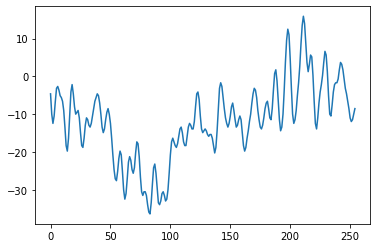

In [14]:
df = pd.read_csv("eeg.csv")
df = df.iloc[771:1026, ]
df = df.reset_index(level = 0)
df = df.reset_index(level = 0)
plt.plot(df["level_0"], df["-0.061"])

In [36]:
df.shape

(255, 6)

In [16]:
df.dtypes

level_0      int64
index        int64
89          object
FP1         object
0           object
-0.061     float64
dtype: object

/Users/kimhyunkyunkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='-0.061'>

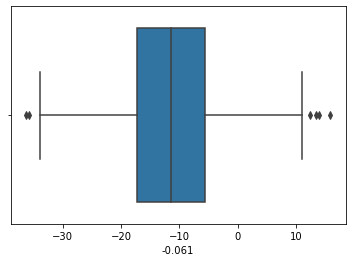

In [37]:
import seaborn as sns
sns.boxplot(df["-0.061"])

In [38]:
Q1 = np.percentile(df["-0.061"], 25)
Q3 = np.percentile(df["-0.061"], 75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 

upper_array = np.where(df["-0.061"]>=upper)[0]
lower_array = np.where(df["-0.061"]<=lower)[0]
 
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)


In [39]:
df.shape

(249, 6)

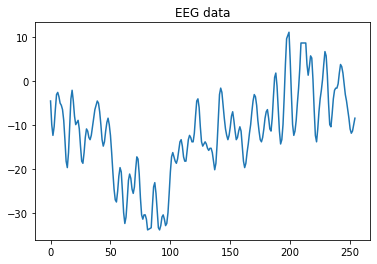

In [45]:
plt.title('EEG data')
plt.plot(df["level_0"], df["-0.061"])

In [43]:
# Try to increase R^2 using IQR to delete outliers

X = df[["level_0"]]
y = df['-0.061']
y_true = y
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
function_set = ['add', 'sub', 'mul', 'div', 'sqrt','sin', 'cos']
est_gp = SymbolicRegressor(population_size=5000, function_set = function_set,
                           generations=100, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)
score_gp = est_gp.score(X_test, y_test)
print('R2:', score_gp)
converter = {
    'add': lambda x, y : x + y,
    'sub': lambda x, y : x - y,
    'mul': lambda x, y : x*y,
    'div': lambda x, y : x/y,
    'sqrt': lambda x : x**0.5,
    'log': lambda x : log(x),
    'abs': lambda x : abs(x),
    'neg': lambda x : -x,
    'inv': lambda x : 1/x,
    'max': lambda x, y : max(x, y),
    'min': lambda x, y : min(x, y),
    'sin': lambda x : sin(x),
    'cos': lambda x : cos(x),
    'pow': lambda x, y : x**y,
}
next_e = sympify(str(est_gp._program), locals=converter)
next_e


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    18.73      6.65294e+06        6          7.72433           7.1667      4.89m
   1    16.50      1.18899e+06       64          7.33221          7.72526      4.51m
   2    22.51          13334.3       22          6.89847          8.54848      4.90m
   3    19.18      7.72895e+06       22          6.86713          8.82008      4.79m
   4     8.90          153.421       46          6.66343          5.09449      4.18m
   5     9.25          613.168       39          6.22116           8.8941      4.00m
   6    16.00          4647.32       45          6.19869          5.21641      4.37m
   7    26.60          22463.5       48          5.76448          8.20391      4.99m
   8    35.13          104.951       60          5.62949          6.46493  

  94    79.47          205.455       87          3.21979          6.11216     28.64s
  95    79.08          65.5541       88          3.25228          4.99252     23.52s
  96    79.55          899.316       86          3.22328          5.23085     17.15s
  97    79.46          919.508       96          3.28355          4.20069     11.45s
  98    79.70          306.279       79          3.26428          5.99753      5.74s
  99    79.85          156.403       79          3.19695          5.87234      0.00s
R2: 0.5357539096292028


(-cos(X0**0.25 + 0.573686821548013) + cos(sin(2.87508328783391*X0**0.25) + 12.0789473684211))*(-3.55586524616231*X0**0.25 - 3.55672593912412*sin(X0**0.5*sin(sin(X0**0.25))) + 2*cos(X0**0.5) + cos(2.93296417090969*X0**0.5) + cos(2.99478308786095*X0**0.5) + cos(8.15762830074341*X0**0.5))

Text(0.5, 0, 'n')

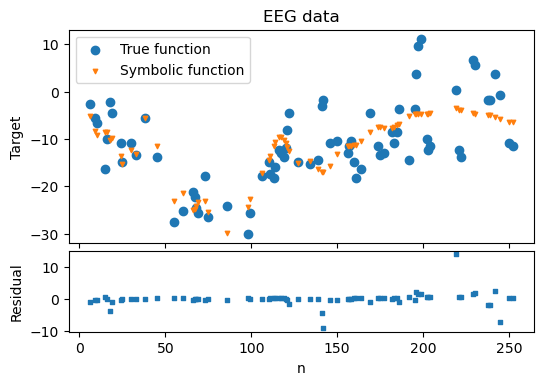

In [44]:
y_gp = est_gp.predict(X_test)
fig = plt.figure(constrained_layout=False, dpi=100)
gs = fig.add_gridspec(nrows=7, ncols=1)
f_ax = fig.add_subplot(gs[0:5,0])
plt.title('EEG data')
plt.scatter(X_test, y_test, label = 'True function')
plt.scatter(X_test, y_gp, marker = 'v', s = 10, label = 'Symbolic function')
plt.legend()
plt.ylabel('Target')
f_ax2 = fig.add_subplot(gs[5:7, 0])
plt.scatter(X_test, 1. - y_gp/y_test, marker = 's', s = 10)
plt.ylabel('Residual')
plt.xlabel('n')

In [9]:
next_e

(-cos(X0**0.25 + 0.573686821548013) + cos(sin(2.87508328783391*X0**0.25) + 12.0789473684211))*(-3.55586524616231*X0**0.25 - 3.55672593912412*sin(X0**0.5*sin(sin(X0**0.25))) + 2*cos(X0**0.5) + cos(2.93296417090969*X0**0.5) + cos(2.99478308786095*X0**0.5) + cos(8.15762830074341*X0**0.5))

# PPG

In [24]:
df1 = pd.read_csv("ppg.csv")

In [25]:
df1.dtypes

Time          object
Red_Signal     int64
dtype: object

In [11]:
df1 = df1.iloc[0:300, ]

/Users/kimhyunkyunkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Red_Signal'>

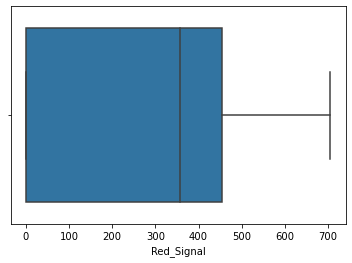

In [12]:
sns.boxplot(df1["Red_Signal"])

In [13]:
df1 = df1.reset_index(level = 0)

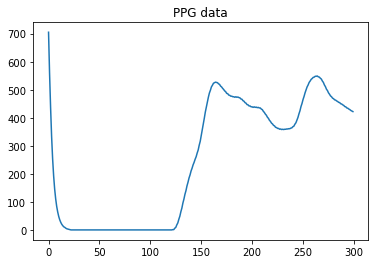

In [47]:
plt.title('PPG data')
plt.plot(df1["index"], df1["Red_Signal"])

In [15]:
# Increase parsimony, compare between different parsimony_coefficient
X = df1[["index"]]
y = df1["Red_Signal"]
y_true = y
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
function_set = ['add', 'sub', 'mul', 'div',
                'log', 'inv','sin', 'cos']
est_gp = SymbolicRegressor(population_size=5000, function_set = function_set,
                           generations=40, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.1, random_state=0)
est_gp.fit(X_train, y_train)
score_gp = est_gp.score(X_test, y_test)
print('R2:', score_gp)
converter = {
    'add': lambda x, y : x + y,
    'sub': lambda x, y : x - y,
    'mul': lambda x, y : x*y,
    'div': lambda x, y : x/y,
    'sqrt': lambda x : x**0.5,
    'log': lambda x : log(x),
    'abs': lambda x : abs(x),
    'neg': lambda x : -x,
    'inv': lambda x : 1/x,
    'max': lambda x, y : max(x, y),
    'min': lambda x, y : min(x, y),
    'sin': lambda x : sin(x),
    'cos': lambda x : cos(x),
    'pow': lambda x, y : x**y,
}
next_e = sympify(str(est_gp._program), locals=converter)
next_e

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.94      1.56524e+06        7          103.845          151.854      1.99m
   1    13.61           413939       16          100.854          104.313      1.81m
   2    14.88          7168.45       18          91.2638          93.4994      1.82m
   3    12.04            11398       18          90.5572          99.8587      1.64m
   4    14.67          9503.91       38          73.4627           62.306      1.73m
   5    22.57           560992       38          70.5661          72.9931      2.06m
   6    26.35          19212.6       42          57.6541          105.324      2.08m
   7    30.54          28066.5       36          60.0483          54.7131      2.16m
   8    40.28           154501       33          52.4265           123.53  

18.5361522119009*(2.48891467118554*X0 + 1/log(log(-0.59783700075562 + I*pi)))*cos(cos(log(X0)))/(X0**2*(0.023*X0 - 0.00204311791525216))

Text(0.5, 0, 'n')

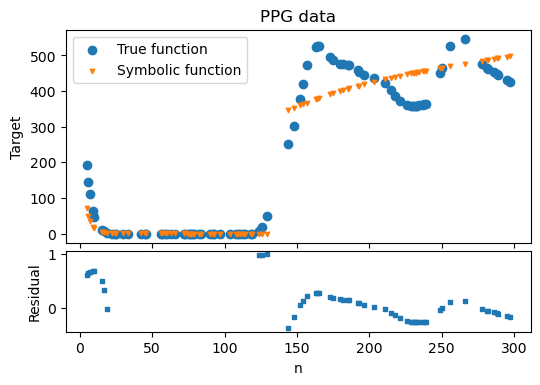

In [16]:
y_gp = est_gp.predict(X_test)
fig = plt.figure(constrained_layout=False, dpi=100)
gs = fig.add_gridspec(nrows=7, ncols=1)
f_ax = fig.add_subplot(gs[0:5,0])
plt.title('PPG data')
plt.scatter(X_test, y_test, label = 'True function')
plt.scatter(X_test, y_gp, marker = 'v', s = 10, label = 'Symbolic function')
plt.legend()
plt.ylabel('Target')
f_ax2 = fig.add_subplot(gs[5:7, 0])
plt.scatter(X_test, 1. - y_gp/y_test, marker = 's', s = 10)
plt.ylabel('Residual')
plt.xlabel('n')

# Accelerometer Data-Climb the stairs

In [26]:
df2 = pd.read_csv("acc_climbStair.txt", sep =" ", header = None)

In [29]:
df2.dtypes

index    int64
x        int64
y        int64
z        int64
dtype: object

In [28]:
df2 = df2.reset_index(level = 0)
df2.columns = ["index", "x", "y", "z"]
sns.boxplot(df2["y"])



NameError: name 'sns' is not defined

In [19]:
# change with 2 * IQR or 1.75 * IQR or 1
Q1 = np.percentile(df2["y"], 25)
Q3 = np.percentile(df2["y"], 75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 

upper_array = np.where(df2["y"]>=upper)[0]
lower_array = np.where(df2["y"]<=lower)[0]
 
df2.drop(index=upper_array, inplace=True)
df2.drop(index=lower_array, inplace=True)

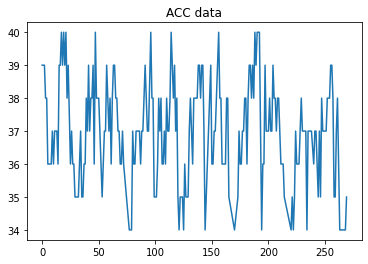

In [48]:
# IQR Range to delete outliers
plt.title('ACC data')
plt.plot(df2["index"], df2["y"])


In [21]:
X = df2[["index"]]
y = df2["y"]
y_true = y
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'inv', 'sin', 'cos']
est_gp = SymbolicRegressor(population_size=5000, function_set = function_set,
                           generations=60, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.001, random_state=0)
est_gp.fit(X_train, y_train)
score_gp = est_gp.score(X_test, y_test)
print('R2:', score_gp)
converter = {
    'add': lambda x, y : x + y,
    'sub': lambda x, y : x - y,
    'mul': lambda x, y : x*y,
    'div': lambda x, y : x/y,
    'sqrt': lambda x : x**0.5,
    'log': lambda x : log(x),
    'abs': lambda x : abs(x),
    'neg': lambda x : -x,
    'inv': lambda x : 1/x,
    'max': lambda x, y : max(x, y),
    'min': lambda x, y : min(x, y),
    'sin': lambda x : sin(x),
    'cos': lambda x : cos(x),
    'pow': lambda x, y : x**y,
}
next_e = sympify(str(est_gp._program), locals=converter)
next_e

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.13          8958.41       21          1.24683           1.2417      2.78m
   1    14.88          3402.41       21          1.19791          1.67627      2.76m
   2    20.03          18765.8       24          1.13163          1.58762      2.99m
   3    23.15          3310.17       33          1.12772          1.77834      3.26m
   4    22.42          67.6999       18          1.12589          1.64716      3.14m
   5    22.62          85.4092       16          1.10352          1.76943      3.09m
   6    22.04          94.2177       50          1.10218          1.79536      3.07m
   7    21.27          190.413       14          1.11392          1.76597      2.89m
   8    20.14          98.1527       18          1.03687          1.50813  

cos(0.27*X0 + 0.543827192766729) + 36.1689927061491

Text(0.5, 0, 'n')

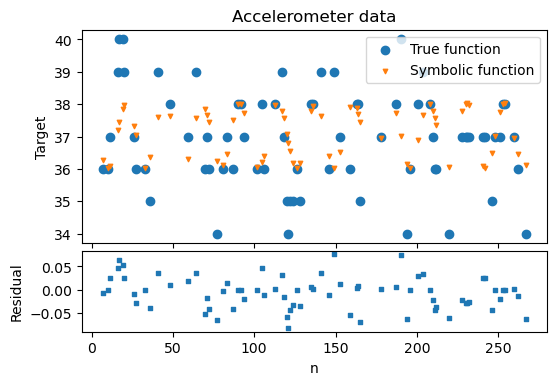

In [22]:
y_gp = est_gp.predict(X_test)
fig = plt.figure(constrained_layout=False, dpi=100)
gs = fig.add_gridspec(nrows=7, ncols=1)
f_ax = fig.add_subplot(gs[0:5,0])
plt.title('Accelerometer data')
plt.scatter(X_test, y_test, label = 'True function')
plt.scatter(X_test, y_gp, marker = 'v', s = 10, label = 'Symbolic function')
plt.legend()
plt.ylabel('Target')
f_ax2 = fig.add_subplot(gs[5:7, 0])
plt.scatter(X_test, 1. - y_gp/y_test, marker = 's', s = 10)
plt.ylabel('Residual')
plt.xlabel('n')

# CGM

In [30]:
# Using IQR to delete outliers
df3 = pd.read_csv("cgm.csv")
df3 = df3.reset_index(level = 0)

In [34]:
df3["cgmSeries_ 1"]

0     256
1     260
2     232
3     228
4     137
5     213
6     164
7     228
8     187
9     134
10    219
11    227
12    187
13    157
14    121
15    207
16    216
17     80
18    180
19    136
20    127
21     93
22    150
23     71
24    176
25     97
26     69
27     98
28    190
29    167
30     78
31    106
32    164
Name: cgmSeries_ 1, dtype: int64

/Users/kimhyunkyunkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgmSeries_ 1'>

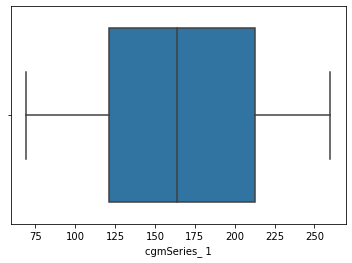

In [52]:
sns.boxplot(df3["cgmSeries_ 1"])

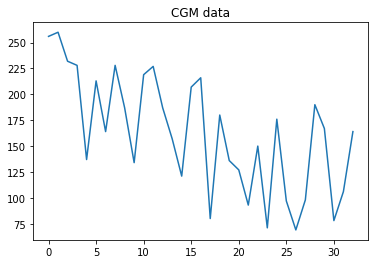

In [49]:
# Apply same as previous one
plt.title('CGM data')
plt.plot(df3["index"], df3["cgmSeries_ 1"])

In [53]:

X = df3[["index"]]
y = df3["cgmSeries_ 1"]
y_true = y
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
function_set = ['add', 'sub', 'mul', 'div']
est_gp = SymbolicRegressor(population_size=5000, function_set = function_set,
                           generations=40, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.1, random_state=0)
est_gp.fit(X_train, y_train)
score_gp = est_gp.score(X_test, y_test)
print('R2:', score_gp)
converter = {
    'add': lambda x, y : x + y,
    'sub': lambda x, y : x - y,
    'mul': lambda x, y : x*y,
    'div': lambda x, y : x/y,
    'sqrt': lambda x : x**0.5,
    'log': lambda x : log(x),
    'abs': lambda x : abs(x),
    'neg': lambda x : -x,
    'inv': lambda x : 1/x,
    'max': lambda x, y : max(x, y),
    'min': lambda x, y : min(x, y),
    'sin': lambda x : sin(x),
    'cos': lambda x : cos(x),
    'pow': lambda x, y : x**y,
}
next_e = sympify(str(est_gp._program), locals=converter)
next_e

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    48.81      2.95459e+10       63          43.2535          35.9963      3.26m
   1    31.38          38606.5       63          39.4222          61.5386      2.20m
   2    40.26      3.08374e+07       65          33.3143          93.3774      2.41m
   3    49.12      9.88011e+07       63          35.7703          44.1841      2.52m
   4    54.51          61777.9       73          32.5973           49.871      2.72m
   5    54.22      2.04396e+06       69          31.3953          61.5102      2.53m
   6    56.03           582041       77          30.1731          61.5071      2.48m
   7    54.66           117585       77           29.118          72.6791      2.37m
   8    53.39           216537       65          28.2544           78.369  

-3*X0 + 95.1142962002236 + 120.147172145826*(X0 + 0.426)/X0

Text(0.5, 0, 'n')

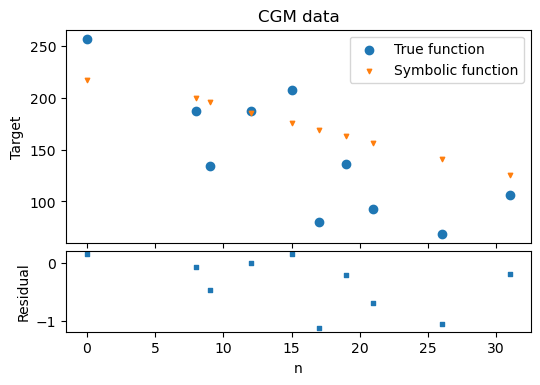

In [27]:
y_gp = est_gp.predict(X_test)
fig = plt.figure(constrained_layout=False, dpi=100)
gs = fig.add_gridspec(nrows=7, ncols=1)
f_ax = fig.add_subplot(gs[0:5,0])
plt.title('CGM data')
plt.scatter(X_test, y_test, label = 'True function')
plt.scatter(X_test, y_gp, marker = 'v', s = 10, label = 'Symbolic function')
plt.legend()
plt.ylabel('Target')
f_ax2 = fig.add_subplot(gs[5:7, 0])
plt.scatter(X_test, 1. - y_gp/y_test, marker = 's', s = 10)
plt.ylabel('Residual')
plt.xlabel('n')

# Respiratory signals

In [35]:
df4 = pd.read_csv("res.csv")

In [36]:
df4 = df4.reset_index(level = 0)
df4 = df4.iloc[0:1000, ]

In [37]:
df4.dtypes

index         int64
Time [s]    float64
 RESP       float64
 PLETH      float64
 V          float64
 AVR        float64
 II         float64
dtype: object

/Users/kimhyunkyunkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' RESP'>

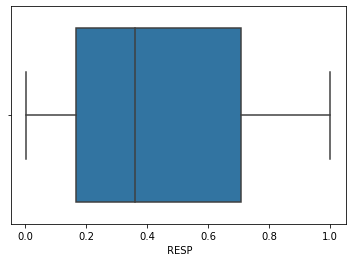

In [56]:
sns.boxplot(df4[" RESP"])

In [42]:
df4

,index,Time [s],RESP,PLETH,V,AVR,II
0,0,0.000,0.35386,0.43597,0.52549,0.30392,0.72549
1,1,0.008,0.35679,0.43206,0.51961,0.33529,0.67059
2,2,0.016,0.35875,0.42815,0.51569,0.37451,0.60980
3,3,0.024,0.36168,0.42424,0.50588,0.41961,0.55098
4,4,0.032,0.36364,0.42131,0.50980,0.44902,0.50000
...,...,...,...,...,...,...,...
995,995,7.960,0.76442,0.47116,0.46471,0.57451,0.31961
996,996,7.968,0.77713,0.49071,0.45490,0.57059,0.33529
997,997,7.976,0.78983,0.50733,0.46471,0.56471,0.32353
998,998,7.984,0.80254,0.52004,0.47451,0.56471,0.32941


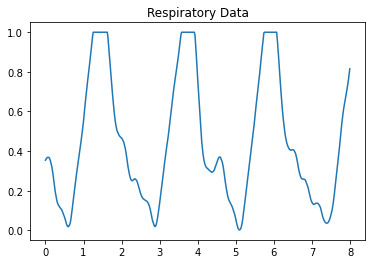

In [41]:
plt.title('Respiratory Data')
plt.plot(df4["index"], df4[" RESP"])

In [40]:
df4.columns

Index(['index', 'Time [s]', ' RESP', ' PLETH', ' V', ' AVR', ' II'], dtype='object')

In [60]:
X = df4[["index"]]
y = df4[" RESP"]
y_true = y
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'abs',
                'log', 'inv','sin', 'cos']
est_gp = SymbolicRegressor(population_size=5000, function_set = function_set,
                           generations=60, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.001, random_state=0)
est_gp.fit(X_train, y_train)
score_gp = est_gp.score(X_test, y_test)
print('R2:', score_gp)
converter = {
    'add': lambda x, y : x + y,
    'sub': lambda x, y : x - y,
    'mul': lambda x, y : x*y,
    'div': lambda x, y : x/y,
    'sqrt': lambda x : x**0.5,
    'log': lambda x : log(x),
    'abs': lambda x : abs(x),
    'neg': lambda x : -x,
    'inv': lambda x : 1/x,
    'max': lambda x, y : max(x, y),
    'min': lambda x, y : min(x, y),
    'sin': lambda x : sin(x),
    'cos': lambda x : cos(x),
    'pow': lambda x, y : x**y,
}
next_e = sympify(str(est_gp._program), locals=converter)
next_e

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.62      1.22721e+06       12         0.267829         0.305038      2.98m
   1     8.55          222.253        2         0.264162         0.340057      2.70m
   2     5.94          3775.01       11         0.254849          0.29593      2.58m
   3     3.54          464.865       11         0.259075         0.257893      2.21m
   4     2.61          845.242       11         0.257332         0.273586      2.08m
   5     2.53          2424.45       10         0.255104         0.293638      2.04m
   6     2.31          790.878       10         0.253931         0.304196      2.00m
   7     2.75          1670.44       14         0.246007         0.242991      2.09m
   8     3.94           953.26       14         0.237962         0.315394  

(sin(sin(0.628490254498827*X0**0.5))/(sin(0.978774744259372*(-X0)**0.5) + sin(sin(0.628490254498827*X0**0.5) + sin(X0**0.5) + sin(sin(X0**0.5))) + sin(sin(0.978774744259372*(-X0)**0.5)) - 5.37634408602151 + 2/cos(log(X0))))**0.5

Text(0.5, 0, 'n')

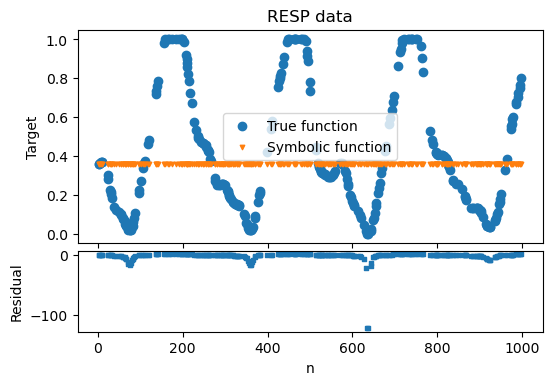

In [59]:
y_gp = est_gp.predict(X_test)
fig = plt.figure(constrained_layout=False, dpi=100)
gs = fig.add_gridspec(nrows=7, ncols=1)
f_ax = fig.add_subplot(gs[0:5,0])
plt.title('RESP data')
plt.scatter(X_test, y_test, label = 'True function')
plt.scatter(X_test, y_gp, marker = 'v', s = 10, label = 'Symbolic function')
plt.legend()
plt.ylabel('Target')
f_ax2 = fig.add_subplot(gs[5:7, 0])
plt.scatter(X_test, 1. - y_gp/y_test, marker = 's', s = 10)
plt.ylabel('Residual')
plt.xlabel('n')

hard to fit the model. My personal opinion is because of inhalation and exhalation.